In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import scipy.io.wavfile as wav
import IPython.display as ipd
from IPython.display import HTML
import pywt

## . . Import the pywt library
## . . Uncomment if necessary
#!pip install PyWavelets

# LAB 13 - Applications of Wavelet Transform


## DUE:  26 April 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499 

The purpose of this lab is to give you practice with applications of the wavelet transform.

Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help the TA with the grading process.**

# Q1 - Computing the central ferquency for continuous wavelets

**(1a)** Import the pyWavelets package and create a wavelet function object for a continuous wavelet.

Hint: Check the variable *wavelet_func* in the *plotWavelets* function

In [2]:
w=pywt.ContinuousWavelet("morl")

**(1b)** List all availble Gaussian and Morlet wavelets

In [3]:
for family in pywt.families():
    if (family == "gaus"):
        print("%s family: " % family + ', '.join(pywt.wavelist(family)))
    elif (family == "morl"):
        print("%s family: " % family + ', '.join(pywt.wavelist(family)))
    else:
        continue

gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
morl family: morl


**(1c)** Build one wavelet from each of the two lists above and then compute the magnitude spectra each.

In [4]:
#build wavelet
wG = pywt.ContinuousWavelet('gaus7')
wM = pywt.ContinuousWavelet('morl')
time = np.arange(-4, 4, 0.01)

psiG, xG = wG.wavefun(length=800)
psiM, xM = wM.wavefun(length=800)

#compute magnitude spectra
gFFT= np.fft.fft(psiG)
mFFT= np.fft.fft(psiM)
magG= np.abs(gFFT)
magM= np.abs(mFFT)

print(len(xG))
print(len(xM))

800
800


**(1d)** Compute the frequency values for the two spectra from (1c).

In [5]:
# I am going to assume we are doing 100 Hz sampling
dt= 0.01
freqs= np.fft.fftfreq(len(time), dt)

**(1e)** Plot the two wavelets along with first half of their amplitude spectra using the correct x-axis values for the wavelets and their spectra.

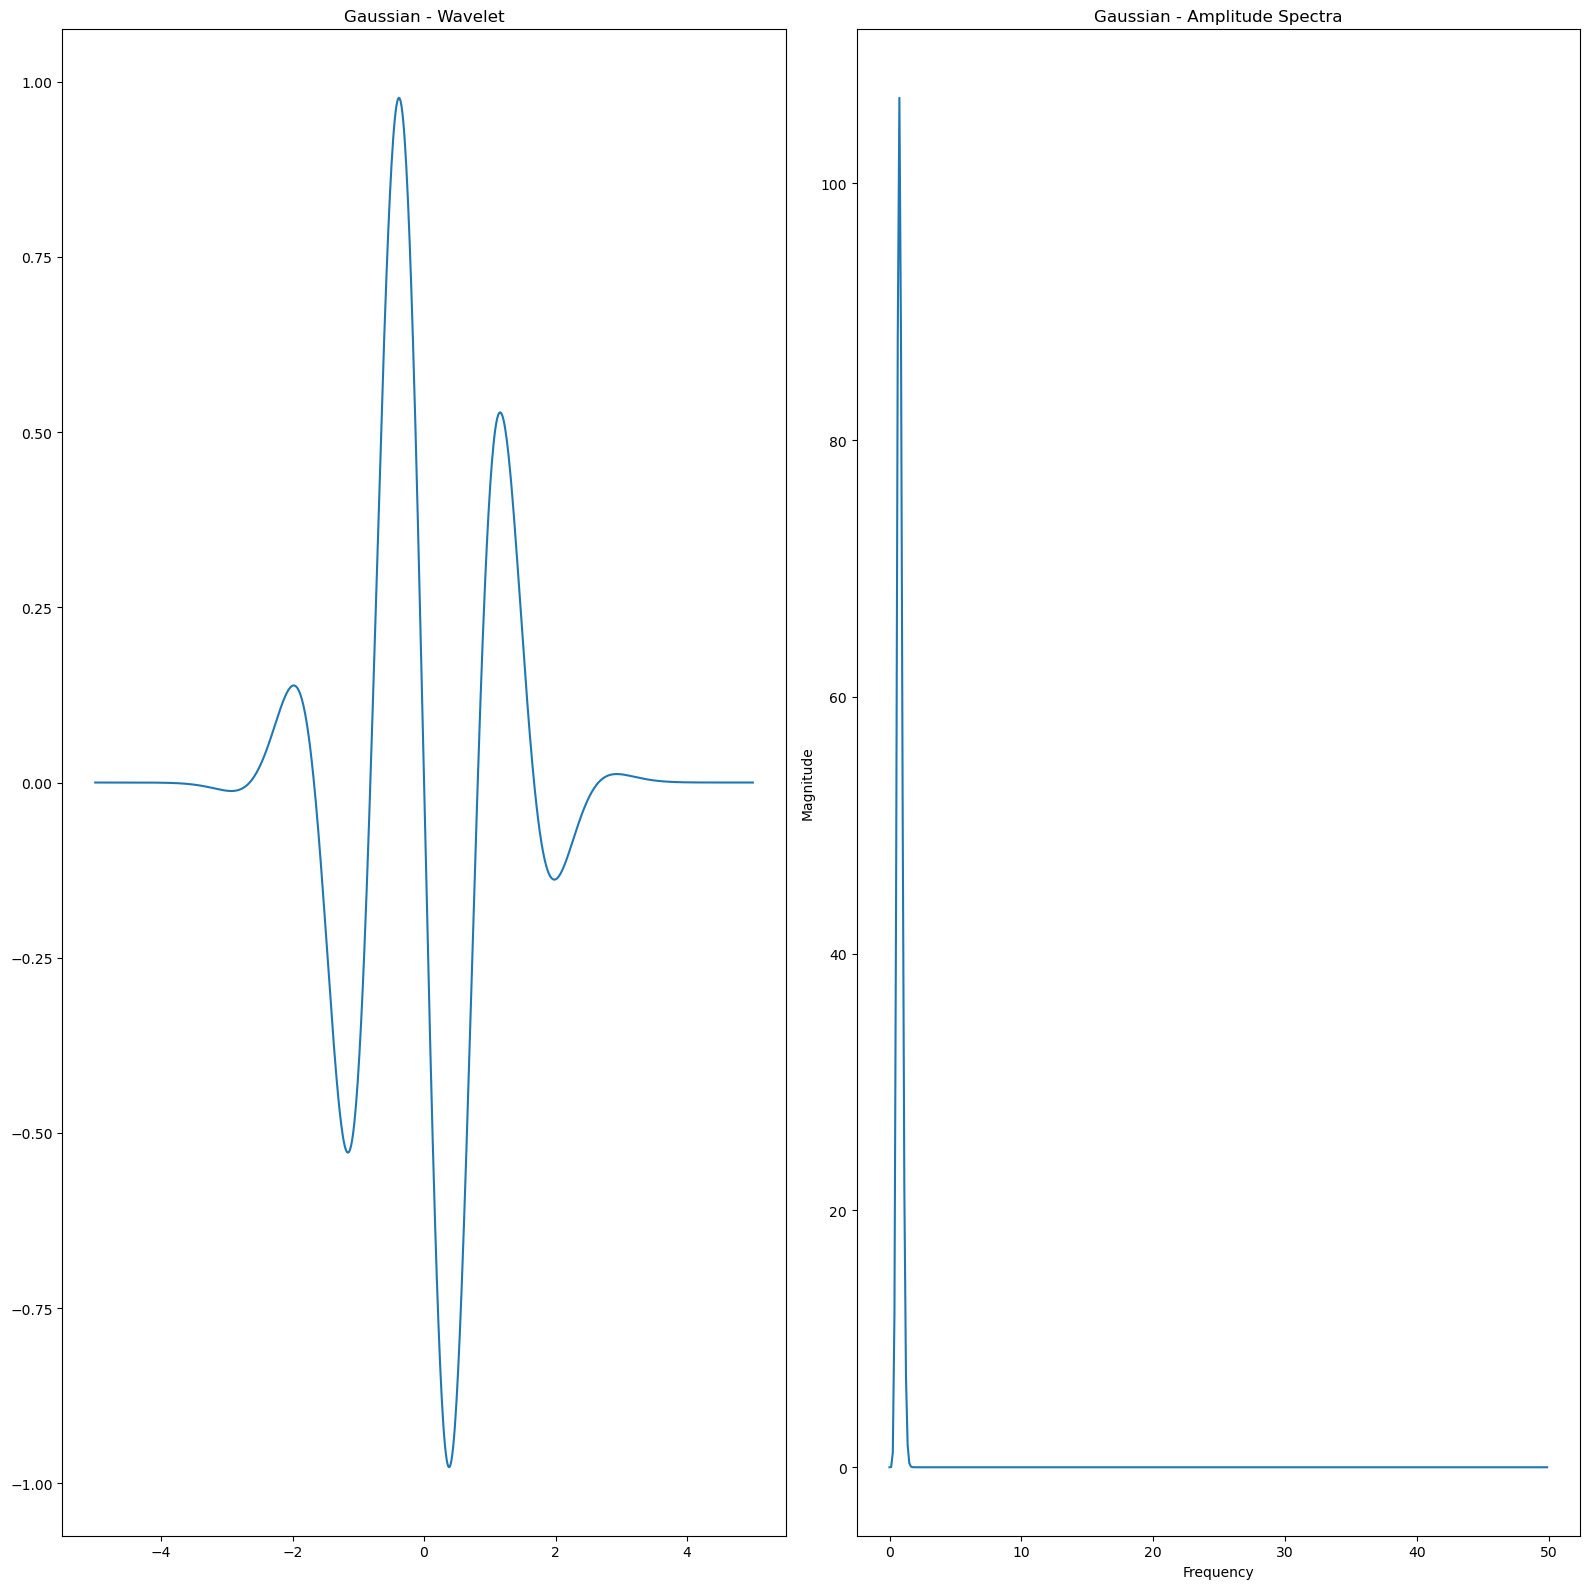

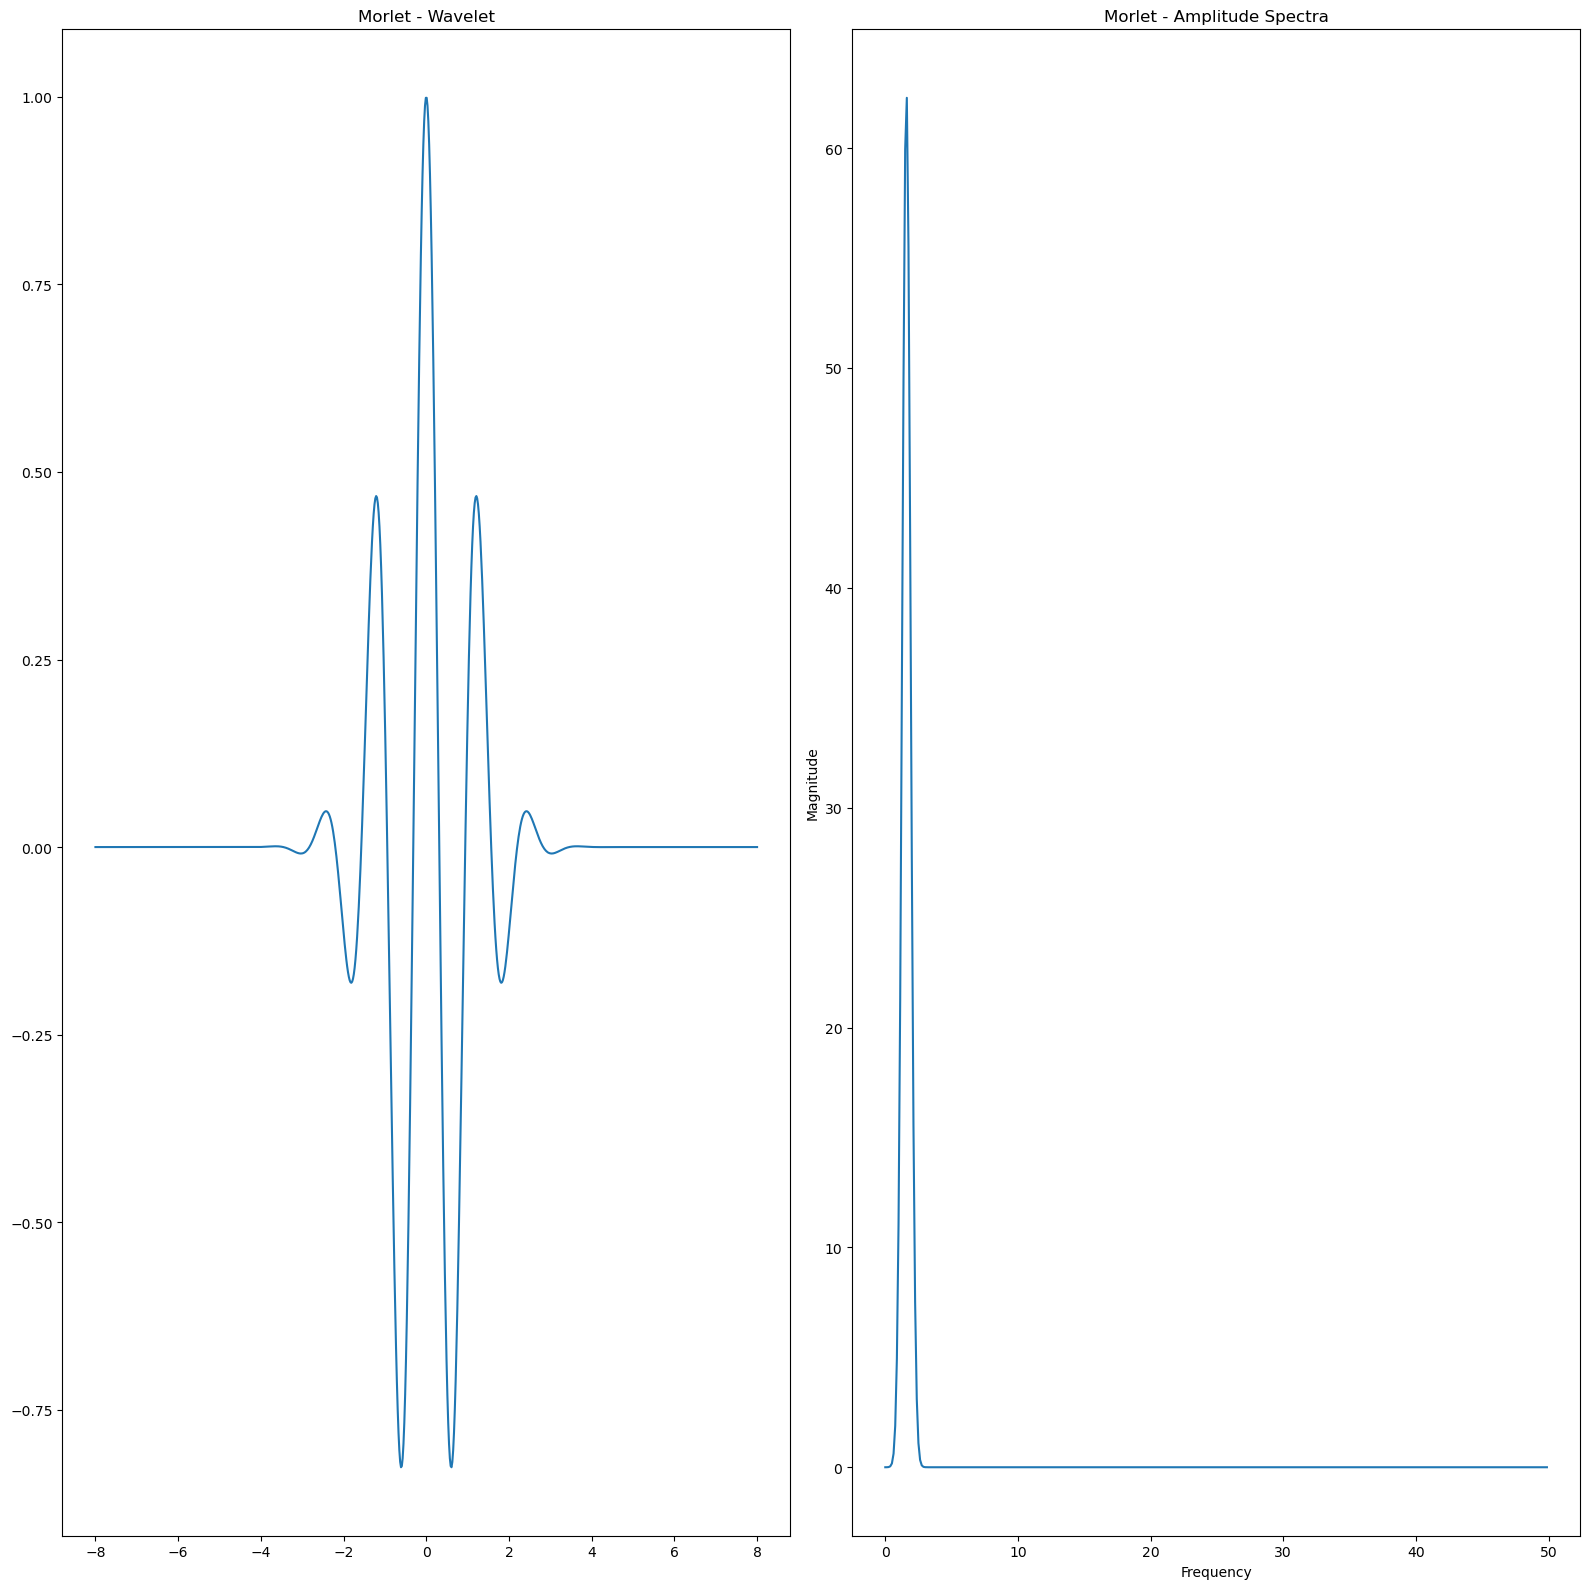

In [6]:
plt.figure(figsize=(16,16))

#gaussian
plt.subplot(1, 2, 1)
plt.plot(xG, psiG)
plt.title("Gaussian - Wavelet")

plt.subplot(1, 2, 2)
plt.plot(freqs[: len(freqs)//2], magG[:len(magG)//2]) 
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Gaussian - Amplitude Spectra')

plt.tight_layout()
plt.show()

#morlet
plt.figure(figsize=(16,16))

plt.subplot(1, 2, 1)
plt.plot(xM, psiM)
plt.title("Morlet - Wavelet")

plt.subplot(1, 2, 2)
plt.plot(freqs[: len(freqs)//2], magM[:len(magM)//2]) 
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Morlet - Amplitude Spectra')

plt.tight_layout()
plt.show()

# Q2 - Computing spectograms using the continuose wavelet transform

**(2a)** Using the central frequencies for the two wavelets in Question 1 above and *dt* for the above signal, find the range of scales that recoveres the full range of frequencies in the above magnitude spectrum for each wavelet.

In [7]:
dt=0.01
fs= 1/dt

#central frequencies
cG= pywt.central_frequency(wG)
cM= pywt.central_frequency(wM) 

rG = pywt.frequency2scale(wG, cG)
rM = pywt.frequency2scale(wM, cM)

scaleG= np.arange(1,100)*rG
scaleM= np.arange(1,100)*rM

**(2b)** Compute the *continuous wavelet transform* using the two wavelets and their corresponding scales above.

In [8]:
coefG2, freqG2= pywt.cwt(psiG, scaleG, wG)
coefM2, freqM2= pywt.cwt(psiM, scaleM, wM)

**(2c)** Plot the two wavelet transforms using *plt.imshow()*. Make sure you change the y-axis values to match the frequencies values returned by *pywt.cwt* .

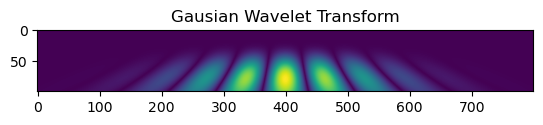

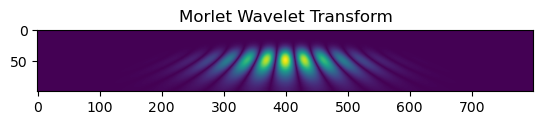

In [9]:
plt.imshow(abs(coefG2))
plt.title("Gausian Wavelet Transform")
plt.show()

plt.imshow(abs(coefM2))
plt.title("Morlet Wavelet Transform")
plt.show()


I spent alot of time on this assignment but could not figure out what to do, I have outputs for every question, so this is what I can submit. Even after reaching out to the TA some questions were left unanswered. For example, what we are considering our signal in the transform and throughout this assignment. I think the directions for this assignment were extremely vague and difficult to interpret. 